Q1. Problem Statement: Support Vector Machine (SVM) Algorithm

You   are   given   a   dataset –“breast_cancer.csv.” Load the   dataset   into   a DataFrame.  Now,  Considering  the “diagnosis”column  as  the  target  variable, perform the  following tasks:

1.Declare feature  vectors  and  the  target  variable  and  perform  data  analysis using correlation matrix and heatmap

2.Split the data into test and train fragments using train_test_split() function in 80:20 ratio (80% train, 20% test)

3.Build a Linear SVM and calculate theaccuracy of the model

4.Build a Gaussian RBF SVM and calculate the accuracy of the model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Breast_cancer_data.csv")
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
117,14.87,16.67,98.64,682.5,0.11620,0
517,19.89,20.26,130.50,1214.0,0.10370,0
362,12.76,18.84,81.87,496.6,0.09676,1
436,12.87,19.54,82.67,509.2,0.09136,1
420,11.57,19.04,74.20,409.7,0.08546,1


In [ ]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


1.Declare feature  vectors  and  the  target  variable  and  perform  data  analysis using correlation matrix and heatmap

In [ ]:
x=df.drop(['diagnosis'],axis=1).values
y=df['diagnosis'].values
print(x)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 8.581e+02 8.455e-02]
 [2.060e+01 2.933e+01 1.401e+02 1.265e+03 1.178e-01]
 [7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 

In [ ]:
d=df.corr()
d

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


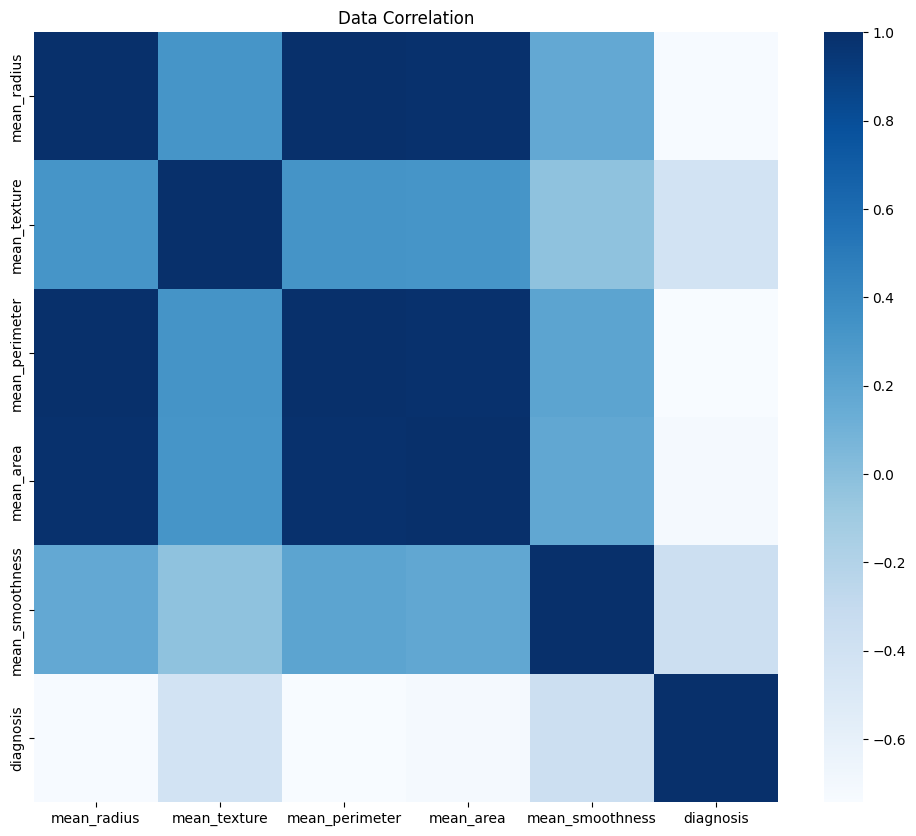

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=d,cmap='Blues')
plt.title("Data Correlation")
plt.xticks(rotation=360)
plt.yticks(rotation=90)
plt.show()

2.Split the data into test and train fragments using train_test_split() function in 80:20 ratio (80% train, 20% test)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:

print("After splitting the data-")
print("size of input train data is:", sys.getsizeof(x_train))
print("sizeof input test data is:", sys.getsizeof(x_test))
print("size of output train data is:", sys.getsizeof(y_train))
print("size of output test data is:", sys.getsizeof(y_test))

After splitting the data-
size of input train data is: 18328
sizeof input test data is: 4688
size of output train data is: 3752
size of output test data is: 1024


3.Build a Linear SVM and calculate the accuracy of the model

In [ ]:
diagno=SVC(C=10,kernel='linear')

In [ ]:
diagno.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [ ]:
pred=diagno.predict(x_test)
acc_diagno=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_diagno)

Accuracy Score:  0.9122807017543859


4.Build a Gaussian RBF SVM and calculate the accuracy of the model

In [ ]:
diagno_rbf=SVC(C=10,kernel='rbf',gamma=2)
diagno_rbf.fit(x_train,y_train)

SVC(C=10, gamma=2)

In [ ]:
pred=diagno_rbf.predict(x_test)
acc_rbf=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_rbf)

Accuracy Score:  0.5877192982456141
